

## **Population solution based metaheuristics (P-metaheuristics)**  

## **P-metaheuristics – Genetic Algorithms (GA)**  

### **Introduction**  
#### **Evolution theory of Charles Darwin**  
Dans une population, les individus sont différents les uns des autres, et certains sont mieux adaptés à leur environnement.  
Cela augmente leurs chances de survie et de reproduction.  
Les générations suivantes hériteront de ces caractéristiques avantageuses, qui deviendront prédominantes dans la population.

---

## **Design**  
### **Génération de population**  
- Génération d'une population initiale  
- Remplacement de la population  

### **Modèle général des P-métaheuristiques**  
1. **Initialisation** :  
   - \( P = P_0 \) /* Génération de la population initiale */  
   - \( t = 0 \)  

2. **Boucle principale** :  
   - **Répéter**  
     - Générer \( P'_t \) /* Nouvelle population */  
     - \( P_{t+1} = \text{Select-Population}(P_t \cup P'_t) \) /* Sélection */  
     - \( t = t + 1 \)  

3. **Arrêt** :  
   - Jusqu'à ce que les critères d'arrêt soient remplis.  
   - **Sortie** : Meilleure(s) solution(s) trouvée(s).  

### **Species Evolution**  
L'évolution est **progressive, très lente** et peut nécessiter **des milliers voire des millions d'années**.

---

## **Pipeline : 6 Étapes**  
### **1. Initialisation**  
#### **Population initiale**  
- **Diversification**  
- **Multiples stratégies**  

| Stratégie                     | Diversité | Coût Computationnel | Qualité des Solutions Initiales |
|--------------------------------|----------|----------------------|----------------------------------|
| Pseudo-aléatoire              | ++       | +++                  | +                                |
| Quasi-aléatoire               | +++      | +                    | +                                |
| Diversification séquentielle  | ++++     | ++                   | +                                |
| Diversification parallèle     | ++++     | +++                  | +                                |
| Heuristique                   | +        | +                    | +++                              |

- **Processus** :  
  1. Générer \( Q \) solutions aléatoires.  
  2. Diversification séquentielle des \( P-Q \) solutions.  
  3. Population totale : \( P \) individus.

---


In [43]:
import numpy as np

def initialize_population(num_genes, population_size, Q):
    # Step 1: Generate Q random solutions
    random_solutions = np.random.randint(2, size=(Q, num_genes))
    
    # Step 2: Sequential diversification for P-Q solutions
    diversified_solutions = np.copy(random_solutions)
    for i in range(population_size - Q):
        diversified_solution = np.copy(random_solutions[i % Q])
        flip_index = i % num_genes  # Sequentially flip each bit
        diversified_solution[flip_index] = 1 - diversified_solution[flip_index]
        diversified_solutions = np.vstack([diversified_solutions, diversified_solution])
    
    return diversified_solutions

# Define parameters for Max-One problem
num_genes = 8
population_size = 10
Q = 5

# Initialize population
population_max_one = initialize_population(num_genes, population_size, Q)

# Print the generated population
print("Population for Max-One problem:")
print(population_max_one)


Population for Max-One problem:
[[0 0 1 0 1 0 1 0]
 [1 0 0 1 1 1 1 0]
 [0 1 1 1 0 0 0 0]
 [0 0 1 1 1 0 0 1]
 [1 1 0 1 0 1 0 0]
 [1 0 1 0 1 0 1 0]
 [1 1 0 1 1 1 1 0]
 [0 1 0 1 0 0 0 0]
 [0 0 1 0 1 0 0 1]
 [1 1 0 1 1 1 0 0]]


### **2. Évaluation**  
#### **Fonction de fitness (Fitness Function)** *(Dépend du problème)*  

- **Problème du Max-One**  
  - Représentation sous forme de **chaîne binaire** :  
    \[
    s = (b_1, b_2, ..., b_n), \quad b_i \in \{0,1\}
    \]  

- **Calcul du score de fitness** :  
  - La fitness correspond au **nombre total de "1" dans la chaîne** :  
    \[
    f(s) = \sum_{i=1}^{n} b_i
    \]  
    où chaque \( b_i \) est un bit de la solution.

- **Importance** :  
  ✅ Guide l'évolution en favorisant les individus avec plus de "1".  
  ✅ Encourage la convergence vers la solution optimale \( (1,1,1,...,1) \).  
  ✅ Simple et efficace pour tester des algorithmes génétiques.  


In [44]:
# Define the fitness function for the Max-One problem
def fitness_max_one(individual):
    return np.sum(individual)

# Evaluate the fitness of the entire population
def evaluate_population(population):
    return np.array([fitness_max_one(ind) for ind in population])

# Run the evaluation phase
fitness_values = evaluate_population(population_max_one)

# Display the fitness values
print("Fitness values:")
print(fitness_values)


Fitness values:
[3 5 3 4 4 4 6 2 3 5]



### **3. Sélection**  
#### **Tournoi (Tournament Selection)**  
- **Stratégie de sélection** :  
  - Sélectionne **\( k = 3 \)** individus aléatoirement.  
  - Le **meilleur** des trois est retenu.  

- **Illustration du processus** :  
  - **Population initiale** → **Sélection aléatoire** → **Meilleur individu sélectionné**.  

- **Avantage** :  
  ✅ Favorise les solutions de meilleure qualité tout en **conservant la diversité**.


In [45]:
def tournament_selection(population, fitness_values, k=3):
    # Randomly select k individuals from the population
    selected_indices = np.random.choice(len(population), k, replace=False)
    
    # Find the individual with the highest fitness among the selected
    best_index = selected_indices[np.argmax(fitness_values[selected_indices])]
    #np.argmax returns the index of the maximum value in the array
    
    # Return the best individual
    return population[best_index]

# Example usage
selected_individual = tournament_selection(population_max_one, fitness_values)
print("Selected individual (Tournament Selection):")
print(selected_individual)


Selected individual (Tournament Selection):
[1 1 0 1 1 1 1 0]



#### **Roulette Wheel Selection** *(Roulette de sélection)*  
- **Principe** :  
  - Chaque individu reçoit une **probabilité de sélection proportionnelle** à sa fitness :  
    \[
    p_i = \frac{f_i}{\sum_{j=1}^{n} f_j}
    \]  

- **Deux approches** :  
  1. **Roulette Wheel Selection** → Sélectionne **un individu unique** par tour.  
  2. **Stochastic Universal Sampling (SUS)** → Sélectionne **plusieurs individus** par tour.  

- **Avantage** :  
  ✅ Favorise les **meilleurs individus** tout en maintenant la diversité génétique.


In [46]:
def roulette_wheel_selection(population, fitness_values):
    # Calculate selection probabilities based on fitness values
    probabilities = fitness_values / np.sum(fitness_values)
    selected_index = np.random.choice(len(population), p=probabilities)
    return population[selected_index]

# Example usage
selected_individual_rw = roulette_wheel_selection(population_max_one, fitness_values)
print("Selected individual (Roulette Wheel Selection):")
print(selected_individual_rw)


Selected individual (Roulette Wheel Selection):
[0 0 1 1 1 0 0 1]



#### **Sélection basée sur le rang (Rank-based selection)**  
- **Principe** :  
  - Classement des individus selon leur **fitness**.  
  - Attribution d’une **probabilité de sélection basée sur le rang**.  

- **Formule** :  
  \[
  P(i) = \frac{2 - s}{\mu} + \frac{2 \cdot r(i)(s - 1)}{\mu (\mu - 1)}
  \]  
  où :  
  - \( 1.0 < s \leq 2.0 \) est la **pression de sélection**.  
  - \( \mu \) est la **taille de la population**.  
  - \( r(i) \) est le **rang** de l’individu.  

---


In [47]:
def rank_based_selection(population, fitness_values, s=1.5):
    
    sorted_indices = np.argsort(fitness_values)  # Sort individuals by fitness
    ranks = np.argsort(sorted_indices) + 1  # Rank of each individual (1-based)
    mu = len(population)
    
    probabilities = (2 - s) / mu + (2 * ranks * (s - 1)) / (mu * (mu - 1))
    probabilities /= probabilities.sum()  # Normalize to get probabilities
    
    selected_index = np.random.choice(len(population), p=probabilities)
    return population[selected_index]

# Example usage
selected_individual_rank = rank_based_selection(population_max_one, fitness_values)
print("Selected individual (Rank-Based Selection):")
print(selected_individual_rank)


Selected individual (Rank-Based Selection):
[0 0 1 1 1 0 0 1]



### **4. Reproduction**  
#### **Crossover (Croisement) – Probabilité Élevée**  
- **Héritabilité** : Transmission des caractéristiques des parents.  
- **Validité** : Maintien de solutions valides.  


In [48]:
def one_point_crossover_population(population, crossover_rate=0.8):
    
    new_population = []
    np.random.shuffle(population)  # Shuffle population to randomly pair parents
    
    for i in range(0, len(population) - 1, 2):  # Process in pairs
        parent1, parent2 = population[i], population[i + 1]
        if np.random.rand() < crossover_rate:
            offspring1, offspring2 = one_point_crossover(parent1, parent2)
            new_population.extend([offspring1, offspring2])
        else:
            new_population.extend([parent1, parent2])  # No crossover, keep parents
        
    # If odd number of individuals, keep the last one
    if len(population) % 2 == 1:
        new_population.append(population[-1])

    return np.array(new_population)

# Apply crossover to the population
population_max_one = one_point_crossover_population(population_max_one)
population_max_one

array([[0, 0, 1, 1, 1, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 1],
       [1, 1, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 0, 1, 1, 1, 1, 0],
       [1, 1, 0, 1, 1, 1, 1, 0],
       [1, 1, 0, 1, 1, 1, 0, 0]], dtype=int32)


#### **Mutation (Faible Probabilité)**  
- **Localité** : Modifie légèrement un individu pour explorer de nouvelles solutions.  
- **Validité** : Maintient une solution acceptable après mutation.  

- **Exemple de mutation** :  
  - Avant mutation : `1 0 0 1 **1** 0 1 1`  
  - Après mutation  : `1 0 0 1 **0** 0 1 1`  

- **Avantage** :  
  ✅ Introduit de nouvelles variations pour éviter les **optima locaux**.  

---


In [49]:
def mutate_one_bit(individual):
    mutation_index = np.random.randint(len(individual))
    mutated_individual = np.copy(individual)
    mutated_individual[mutation_index] = 1 - mutated_individual[mutation_index]
    return mutated_individual

def mutate_population(population):
    for i in range(len(population)):
        population[i] = mutate_one_bit(population[i])
    return population

# Apply mutation to the population
population_max_one = mutate_population(population_max_one)
print("Mutated population:")
print(population_max_one)


Mutated population:
[[0 1 1 1 1 0 0 1]
 [0 1 0 1 1 0 0 0]
 [0 0 0 0 1 0 0 1]
 [0 1 0 1 0 1 0 0]
 [0 0 1 0 1 1 1 0]
 [0 1 1 1 0 0 0 1]
 [1 1 1 0 1 0 1 0]
 [1 0 0 1 1 1 0 0]
 [1 1 0 0 1 1 1 0]
 [1 1 0 1 1 1 1 0]]



### **5. Évaluation**  
- **Mesure la qualité des solutions** via la **fonction de fitness**.  
- Guide la convergence vers une solution optimale.  

---
Fitness Calculation :	Counts the number of 1s in each individual

Population Evaluation :	Applies fitness function to all individuals	

Convergence Check : Checks if an individual has all 1s


In [50]:
# Evaluate the population after reproduction (crossover + mutation)
fitness_values = evaluate_population(population_max_one)

# Display results
print("Fitness values after reproduction:")
print(fitness_values)

# Check if the optimal solution (all 1s) has been reached
optimal_fitness = num_genes  # Maximum possible fitness (all 1s)
best_fitness = np.max(fitness_values)

if best_fitness == optimal_fitness:
    print("Optimal solution reached! ")
else:
    print(f"Best fitness in population: {best_fitness}/{optimal_fitness}")


Fitness values after reproduction:
[5 3 2 3 4 4 5 4 5 6]
Best fitness in population: 6/8



### **6. Remplacement (Replacement)**  
- **Sélection des survivants** : Parents vs. Offsprings.  
- **Stratégies de remplacement** :  
  - **Générationnelle** : Les **descendants remplacent** totalement la population précédente.  
  - **Steady-State** : Seul le **pire parent est remplacé** par le meilleur descendant.  
  - **Élitisme** : **Les meilleurs individus** sont conservés à travers les générations.  


In [51]:
def generational_replacement(offspring_population):
    
    return np.copy(offspring_population)

def steady_state_replacement(population, offspring_population, fitness_values):
    
    worst_parent_index = np.argmin(fitness_values)  # Find worst individual
    best_offspring_index = np.argmax([np.sum(ind) for ind in offspring_population])  # Find best offspring
    
    # Replace worst parent with best offspring
    population[worst_parent_index] = offspring_population[best_offspring_index]
    
    return population

def elitist_replacement(population, offspring_population, fitness_values):
    
    # Identify the best individual from the current population
    best_individual_index = np.argmax(fitness_values)
    best_individual = population[best_individual_index]  # Best solution from previous gen
    
    # Compute offspring fitness
    offspring_fitness = np.array([np.sum(ind) for ind in offspring_population])

    # Find the worst individual in the offspring population
    worst_offspring_index = np.argmin(offspring_fitness)

    # Replace the worst offspring with the best previous individual (if needed)
    new_population = np.copy(offspring_population)
    if np.sum(best_individual) > offspring_fitness[worst_offspring_index]:  
        new_population[worst_offspring_index] = best_individual  # Keep the best from the previous generation

    return new_population



#### **Critères d'arrêt**  
- **Statique** → L'algo s'arrête après un nombre d'**itérations max**.  
- **Dynamique** → L'algo s'arrête après n itérations sans amélioration** ou critères statistiques.  

---


In [52]:
def check_termination_criteria(fitness_values, max_iterations, no_improvement_limit, iteration, best_fitness_history):
    # Static stopping criteria: Maximum iterations reached
    if iteration >= max_iterations:
        return True

    # Dynamic stopping criteria: No improvement for X iterations
    if len(best_fitness_history) > no_improvement_limit:
        if best_fitness_history[-no_improvement_limit:] == [best_fitness_history[-1]] * no_improvement_limit:
            return True

    return False


## Test Complet : Genetic Algorithm for Max-One Problem

In [53]:

# --------- PHASE 1: INITIALIZATION ---------
num_genes = 8
population_size = 10
Q = 5
max_iterations = 50
no_improvement_limit = 10

# Initialize population
population_max_one = initialize_population(num_genes, population_size, Q)
best_fitness_history = []

# --------- PHASE 2: GENETIC ALGORITHM LOOP ---------
for iteration in range(max_iterations):
    # Evaluate fitness
    fitness_values = evaluate_population(population_max_one)
    best_fitness = np.max(fitness_values)
    best_fitness_history.append(best_fitness)

    # Check termination criteria
    if check_termination_criteria(fitness_values, max_iterations, no_improvement_limit, iteration, best_fitness_history):
        print("Stopping criteria met. Ending optimization.")
        break

    # Selection (Tournament Selection for entire population)
    selected_population = np.array([tournament_selection(population_max_one, fitness_values) for _ in range(population_size)])

    # Crossover (Every individual is crossed deterministically)
    offspring_population = one_point_crossover_population(selected_population)

    # Mutation (Every individual undergoes mutation deterministically)
    offspring_population = mutate_population(offspring_population)

    # Replacement (Choose one strategy below)
    # population_max_one = generational_replacement(offspring_population)
    # population_max_one = steady_state_replacement(population_max_one, offspring_population, fitness_values)
    population_max_one = elitist_replacement(population_max_one, offspring_population, fitness_values)

# --------- FINAL EVALUATION ---------
fitness_values = evaluate_population(population_max_one)
best_solution = population_max_one[np.argmax(fitness_values)]
print("\nFinal Best Solution:", best_solution)
print("Final Best Fitness:", np.max(fitness_values))


Stopping criteria met. Ending optimization.

Final Best Solution: [1 1 1 1 1 1 1 1]
Final Best Fitness: 8


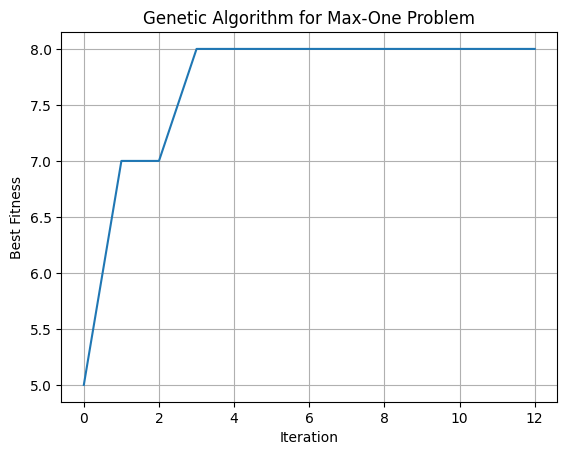

In [55]:
# plot 
import matplotlib.pyplot as plt

plt.plot(best_fitness_history)
plt.xlabel("Iteration")
plt.ylabel("Best Fitness")
plt.title("Genetic Algorithm for Max-One Problem")
plt.grid(True)

plt.show()
